## Preliminaries

In [7]:
# Load in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [8]:
# Load in dataset
df = pd.read_csv('ratings.csv')
# df.head()

# Create ratings matrix
rating_matrix = df.pivot(index='userId', columns='movieId', values='rating')
print(rating_matrix)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.5     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     NaN     NaN     NaN     NaN     NaN     2.5     NaN   
607         4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
608         2.5     2.0     2.0     NaN     NaN     NaN     NaN     NaN   
609         3.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
610         5.0     NaN     NaN     NaN     NaN     5.0     NaN     NaN   

movieId  9       10     

In [9]:
# Part A
# Compute sparsity of movie rating dataset
num_ratings = np.count_nonzero(~rating_matrix.isnull())
num_users = rating_matrix.shape[0]
num_movies = rating_matrix.shape[1]
sparsity = 1 - (num_ratings / (num_users * num_movies))
print("Sparsity: ", sparsity)

Sparsity:  0.9830003169443864


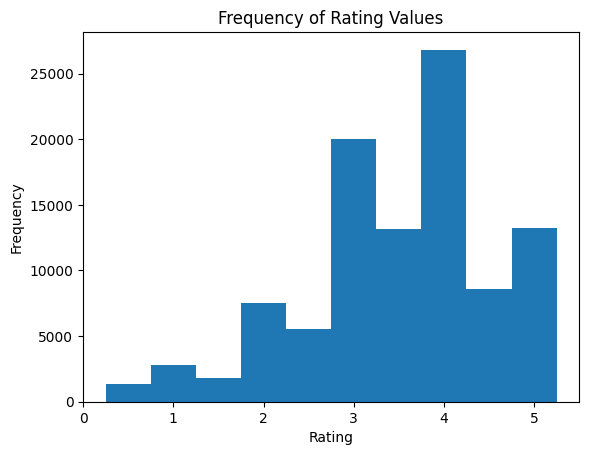

In [10]:
# Part B
# Histogram of frequency of rating values
rating_freq = rating_matrix.stack().value_counts()

# Create histogram with bins of width 0.5
plt.bar(rating_freq.index, rating_freq.values, width = 0.5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Frequency of Rating Values')
plt.show()

Whole number ratings are more commonly given than decimal number ratings. People tend to rate movies positively in general, as shown through the left skew of the distribution. The most common movie rating is a 4 and the least common is 0.5.

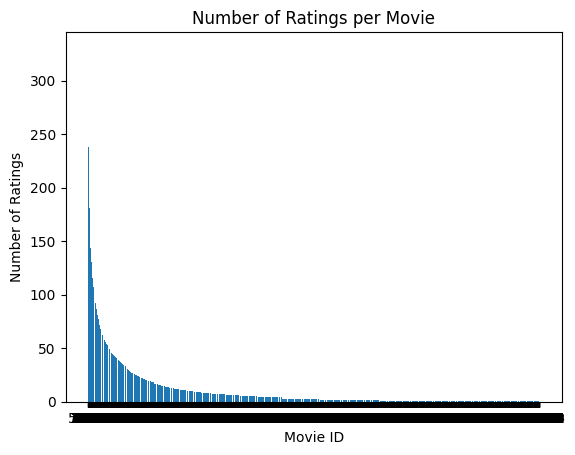

In [11]:
# Part c (takes a minute or two to run)
# Plot distribution of the number of ratings received among movies

# Count number of ratings for each movieId and sort
movie_counts = df['movieId'].value_counts().sort_values(ascending = False)

# Convert movieIds to string to force them to be categorical
movie_counts.index = movie_counts.index.astype(str)

# Plot
plt.bar(movie_counts.index, movie_counts.values)
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Movie')
plt.show()

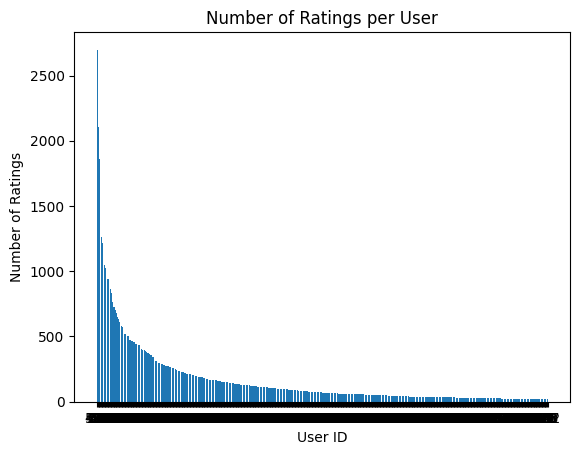

In [13]:
# Part d
# Plot distribution of the number of ratings received among users

# Count number of ratings for each userId and sort
user_counts = df['userId'].value_counts().sort_values(ascending = False)

# Convert userIds to string to force them to be categorical
user_counts.index = user_counts.index.astype(str)

# Plot
plt.bar(user_counts.index, user_counts.values)
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per User')
plt.show()

### Part e

(TODO)

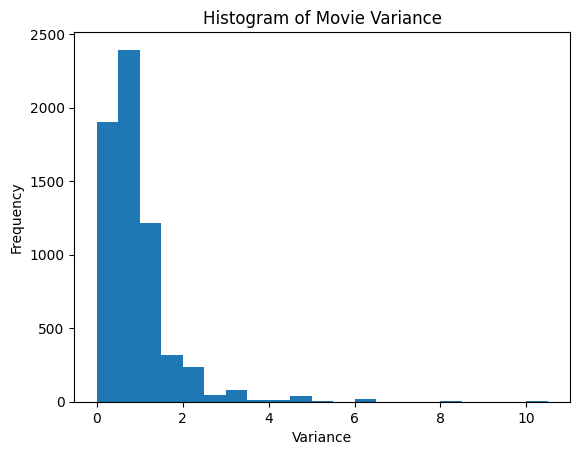

In [15]:
# Part f
# Compute the variance of rating values received by each movie

# Get variances per movieId
movie_variance = df.groupby('movieId')['rating'].var().dropna()

# Plot histogram
binwidth = 0.5
plt.hist(movie_variance, bins = np.arange(min(movie_variance), max(movie_variance) + binwidth, binwidth))
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Variance')
plt.show()

Most movies have a low variance, suggesting agreement amongst users for thes movies. Only a handful of movies had polarized reviews, as shown by the high variance.